<a href="https://colab.research.google.com/github/ignadr/ML-Algorithms-Practice/blob/main/mushroom_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

In [ ]:
# Download latest version
path = kagglehub.dataset_download("uciml/mushroom-classification")

In [ ]:
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mushroom-classification


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')

In [ ]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
df.isna().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


## Preprocessing

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['class'], axis=1), df['class'], test_size=0.2, random_state=42)

In [ ]:
# Encode
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
le = LabelEncoder()

In [ ]:
X_train_enc = ohe.fit_transform(X_train)
X_test_enc = ohe.transform(X_test)

In [ ]:
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [ ]:
X_train_enc.shape

(6499, 117)

In [ ]:
y_train_enc

array([1, 1, 1, ..., 0, 1, 0])

## Logistic regression

In [ ]:
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train_enc, y_train_enc)

In [ ]:
model.score(X_train_enc, y_train_enc)

1.0

In [ ]:
# Predict
y_pred = model.predict(X_test_enc)

In [ ]:
accuracy_score(y_test_enc, y_pred)

1.0

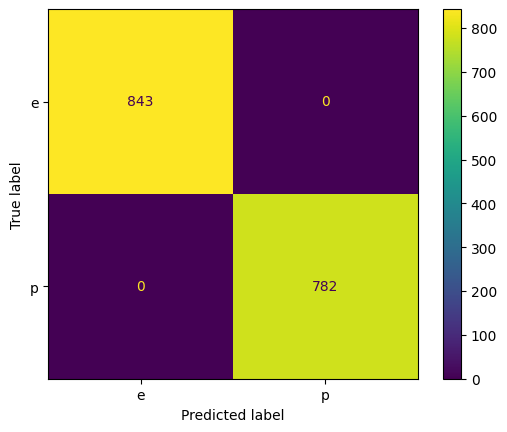

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()